# **Handwritten Digit recognition**

**Artificial Intelligence Intern at Sync Intern Company :**

 *Week-3 & week-4  (Task 2)*



In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
from tensorflow import keras
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
import warnings

sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

In [25]:
train="train.csv"
test="test.csv"

In [26]:
df_train = pd.read_csv(train)
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_test = pd.read_csv(test)
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df_train.shape

(24095, 785)

In [29]:
df_test.shape

(17230, 784)

In [30]:
df_train['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [31]:
df_train['label'].nunique()

10

In [32]:
y_train = df_train['label']
df_train.drop(['label'], axis=1, inplace=True)
df_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_train=df_train/255.0
df_train=df_train.values.reshape(-1,28,28,1)

X_train, X_val, y_train, y_val = train_test_split(df_train,y_train, test_size=0.2, random_state=42,shuffle=True)

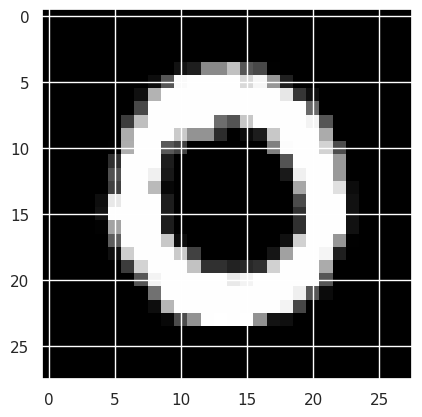

In [34]:
img = np.reshape(df_train[1], (28, 28))
plt.imshow(img, cmap='gray')

In [35]:
size  = 28
channels = 1
batch = 128
epochs = 100

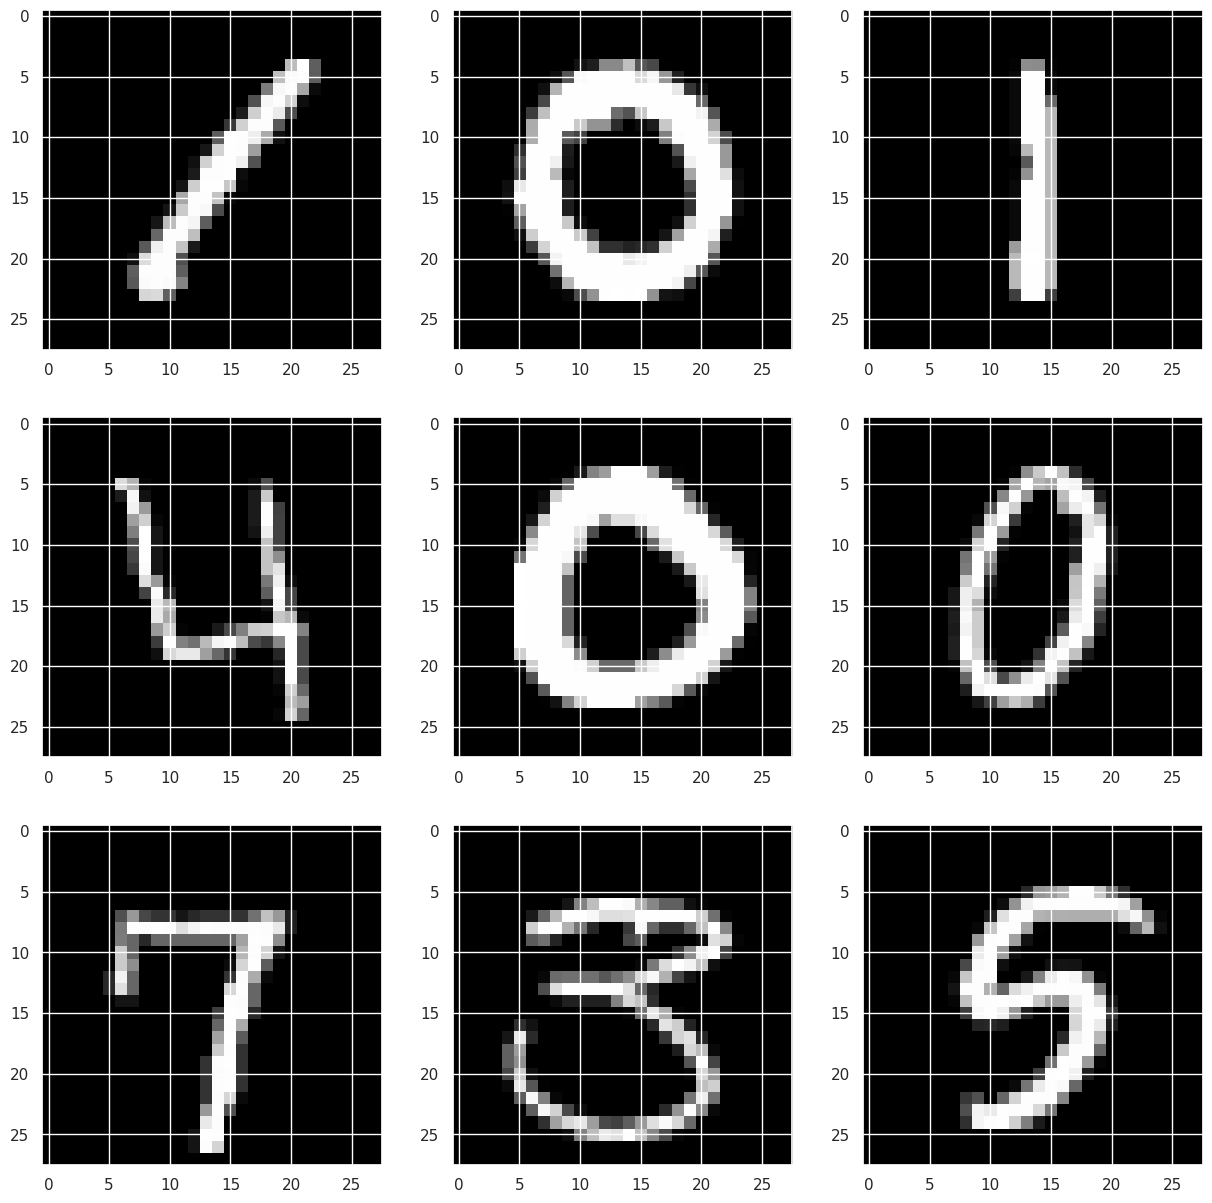

In [36]:
alphabet="0123456789"
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = np.reshape(df_train[i], (28, 28))
    plt.imshow(img, cmap='gray')
    #plt.xlabel([y_train[i]])

In [39]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))

model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(10, activation = "softmax"))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          36928     
                                                      

In [42]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger, LearningRateScheduler,TensorBoard
earlystop=EarlyStopping(patience=10)
filepath = "number.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_best_only=True, mode='max')
log_fname = 'number.csv'
csv_logger = CSVLogger(filename=log_fname,separator=',',append=False)
callback_learningrate = ReduceLROnPlateau(monitor='loss', mode='min', min_delta=0.01, patience=3, factor=.75, min_lr=0.00001, verbose=1)
callbacks_list = [checkpoint, csv_logger,earlystop,callback_learningrate]

In [43]:
history = model.fit(X_train, y_train, epochs=15,batch_size=128, validation_data=(X_val, y_val), callbacks=callbacks_list)

Epoch 1/15
151/151 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2252
Epoch 1: val_accuracy improved from -inf to 0.10064, saving model to number.h5
151/151 [==============================] - 36s 231ms/step - loss: nan - accuracy: 0.2252 - val_loss: nan - val_accuracy: 0.1006 - lr: 0.0010
Epoch 2/15
151/151 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0961
Epoch 2: val_accuracy did not improve from 0.10064
151/151 [==============================] - 31s 209ms/step - loss: nan - accuracy: 0.0961 - val_loss: nan - val_accuracy: 0.1006 - lr: 0.0010
Epoch 3/15
151/151 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0961
Epoch 3: val_accuracy did not improve from 0.10064

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0007500000356230885.
151/151 [==============================] - 34s 226ms/step - loss: nan - accuracy: 0.0961 - val_loss: nan - val_accuracy: 0.1006 - lr: 0.0010
Epoch 4/15
151/151 [====================

In [44]:
# Split the data into features and target
X_test = df_test
X_test=X_test/255.0
X_test=X_test.values.reshape(-1,28,28,1)

In [45]:
pred = model.predict(X_test)

539/539 [==============================] - 9s 16ms/step


In [46]:
testImgPred = [np.argmax(pred[x]) for x in range(50)]

In [47]:
print("Shape of prediction:", pred.shape)

Shape of prediction: (17230, 10)


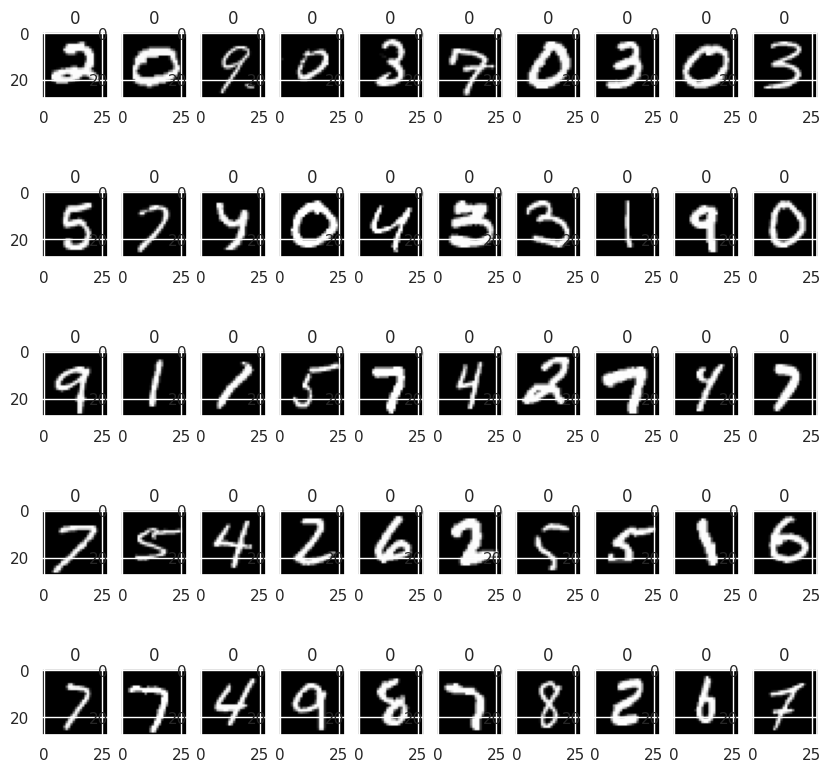

In [48]:
plt.figure(figsize=(10,10))

for i in range (50):
    plt.subplot(5, 10, i+1)
    img = np.reshape(X_test[i], (28, 28))
    plt.imshow(img, cmap='gray')
    plt.title(testImgPred[i])
plt.show()

In [49]:
#Going with first model
#Creating the CSV to Submit
y_pred = [np.argmax(x) for x in pred]

submissionDict = {'ImageId' : df_test.index + 1}
submission = pd.DataFrame(submissionDict)
submission['Label'] = y_pred

In [50]:
submission.head()

submission.to_csv('digit_submission.csv', index=False)

In [51]:
submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
